In [222]:
import numpy as np

X = np.random.normal(size=1000)
e1 = np.random.normal(loc=2, size=1000)
e2 = np.random.normal(loc=2, size=1000)
Y1 = X + e1
Y2 = X + e2

In [233]:
import numpy as np
import util


class Kotlarski():
    def __init__(self, Y1, Y2, loc=0, T=2):
        self.Y1 = Y1
        self.Y2 = Y2
        self.loc = 0
        self.T = T
        
    def ecf(self, t1, t2):
        return np.mean(np.exp(1j*t1*self.Y1 + 1j*t2*self.Y2))

    def d1ecf(self, t1, t2):
        return np.mean(1j*Y1 * np.exp(1j*t1*self.Y1 + 1j*t2*self.Y2))

    def deconvolution(self):
        integrand = lambda u: self.d1ecf(0,u) / self.ecf(0,u)
        # def phi_x(t):
        #     if t>=0:
        #         return np.exp(util.complex_quadrature(integrand, 0, t)[0] - 1j*t*self.loc)
        #     else:
        #         return np.exp(-util.complex_quadrature(integrand, t, 0)[0] - 1j*t*self.loc)
        phi_x  = lambda t: np.exp(util.complex_quadrature(integrand, 0, t)[0] - 1j*t*self.loc)
        phi_e1 = lambda t: self.ecf(t,0)/phi_x(t)
        phi_e2 = lambda t: self.ecf(0,t)/phi_x(t)
        return (phi_x, phi_e1, phi_e2)

    def densities(self):
        def integrand(func, t, u):
            return np.exp(-1j*t*u) * func(t)

        def density(func, u):
            return 1/(2*np.pi) * util.complex_quadrature(lambda t : integrand(func, t, u), -self.T, self.T)[0]
            
        lst = []
        for func in self.deconvolution():
            lst.append(lambda t: density(func, t))
        
        return lst

    def fx(self, x):
        return self.densities()[0](x).real

    def fe1(self, x):
        return self.densities()[1](x).real

    def fe2(self, x):
        return self.densities()[2](x).real



In [236]:
kot = Kotlarski(Y1, Y2)

kot.fx(-1)

(0.21832293037380332+0j)

/Users/xy38/opt/anaconda3/envs/salvage-car/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


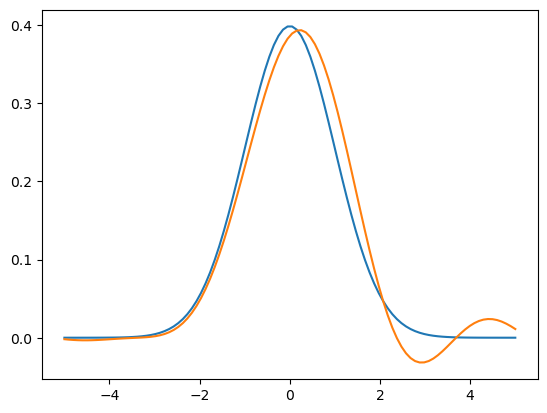

In [228]:
import matplotlib.pyplot as plt

x_plot = np.linspace(-5,5,100)

est_plot = []
for x in x_plot:
    est_plot.append(kot.fx(x))


/Users/xy38/opt/anaconda3/envs/salvage-car/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'densities')

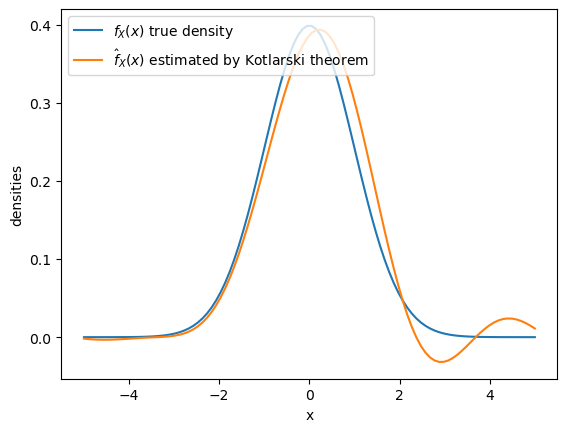

In [246]:
plt.plot(x_plot, scipy.stats.norm.pdf(x_plot), label=r'$f_X(x)$ true density')
plt.plot(x_plot, est_plot, label=r'$\hat{f}_X(x)$ estimated by Kotlarski theorem')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('densities')

In [89]:
a = 1
b = 2
g(1)

4